<a href="https://colab.research.google.com/github/Girish-yml/notebooks/blob/main/SentimentAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utility

In [ ]:
!pip install huggingface_hub
!pip install torch
!pip install cryptography
!pip install psutil

In [65]:
# %%writefile app.py

""" A Utility calss which contains most commonly used functions """

import huggingface_hub
import huggingface_hub.hf_api
import psutil
import torch
import functools
import socket
import cryptography
import cryptography.fernet

class Utility(object):

  def __init__(self, name="Utility") -> None:
    self.name = name
    self.author = "Duc Haba, Girish"
    self._pp("Hello from class", str(self.__class__) + " Class: " + str(self.__class__.__name__))
    self._pp("Code name", self.name)

    #Define encrypted keys
    self._huggingface_key="gAAAAABkgtmOIjpnjwXFWmgh1j2et2kMjHUze-ym6h3BieAp34Sqkqv3EVYvRinETvpw-kXu7RSRl5_9FqrYe-7unfakMvMkU8nHrfB3hBSC76ZTXwkVSzlN0RfBNs9NL8BGjaSJ8mz8"

    #Key for crypto
    self._fkey="=cvsOPRcWD6JONmdr4Sh6-PqF6nT1InYh965mI8f_sef"
    return

  # Print : Pretty print output name-value line
  def _pp(self, a, b,is_print=True):
    # print("%34s : %s" % (str(a), str(b)))
    x = f'{"%34s" % str(a)} : {str(b)}'
    y = None
    if (is_print):
      print(x)
    else:
      y = x
    return y

  # Print : Pretty print the header or footer lines
  def _ph(self,is_print=True):
    x = f'{"-"*34} : {"-"*34}'
    y = None
    if (is_print):
      print(x)
    else:
      y = x
    return y

  # Hugging face : Login to Hugging face
  def _login_hface(self):
    huggingface_hub.login(self._decrypt_it(self._huggingface_key),
      add_to_git_credential=True) # non-blocking login
    self._ph()
    return

  # Hugging face : Push files to Hugging face
  def push_hface_files(self,
    hf_names,
    hf_space="GirishKiran/yml",
    local_dir="/content/"):
    f = str(hf_names) + " is not iteratable, type: " + str(type(hf_names))
    try:
      for f in hf_names:
        lo = local_dir + f
        huggingface_hub.upload_file(
          path_or_fileobj=lo,
          path_in_repo=f,
          repo_id=hf_space,
          repo_type=huggingface_hub.REPO_TYPE_SPACE)
    except Exception as e:
      self._pp("*Error", e)
    return

  # Hugging face : Push folders to Hugging face
  def push_hface_folder(self, hf_folder, hf_space_id, hf_dest_folder=None):
    api = huggingface_hub.HfApi()
    api.upload_folder(folder_path=hf_folder,
      repo_id=hf_space_id,
      path_in_repo=hf_dest_folder,
      repo_type="space")
    return

  # Hugging face : Login to Hugging face
  def _login_hface(self):
    huggingface_hub.login(self._decrypt_it(self._huggingface_key),
      add_to_git_credential=True) # non-blocking login
    self._ph()
    return

  # System Info : Fetch available CPU and RAM of the system
  def fetch_system_info(self):
    s=''
    # Get CPU usage as a percentage
    cpu_usage = psutil.cpu_percent()
    # Get available memory in bytes
    mem = psutil.virtual_memory()
    # Convert bytes to gigabytes
    mem_total_gb = mem.total / (1024 ** 3)
    mem_available_gb = mem.available / (1024 ** 3)
    mem_used_gb = mem.used / (1024 ** 3)
    # Print the results
    s += f"CPU usage: {cpu_usage}%\n"
    s += f"Total memory: {mem_total_gb:.2f} GB\n"
    s += f"Available memory: {mem_available_gb:.2f} GB\n"
    # print(f"Used memory: {mem_used_gb:.2f} GB")
    s += f"Memory usage: {mem_used_gb/mem_total_gb:.2f}%\n"
    return

  # System Info : Fetch GPU information of the system
  def fetch_gpu_info(self):
    s=''
    try:
      s += f'Your GPU is the {torch.cuda.get_device_name(0)}\n'
      s += f'GPU ready staus {torch.cuda.is_available()}\n'
      s += f'GPU allocated RAM: {round(torch.cuda.memory_allocated(0)/1024**3,1)} GB\n'
      s += f'GPU reserved RAM {round(torch.cuda.memory_reserved(0)/1024**3,1)} GB\n'
    except Exception as e:
      s += f'**Warning, No GPU: {e}'
    return s

  # System Info : Fetch host ip address
  def fetch_host_ip(self):
    s=''
    hostname = socket.gethostname()
    ip_address = socket.gethostbyname(hostname)
    s += f"Hostname: {hostname}\n"
    s += f"IP Address: {ip_address}\n"
    return s

  # Create and writes data to the file
  def write_file(self,fname, txt):
    f = open(fname, "w")
    f.writelines("\n".join(txt))
    f.close()
    return

  # Crypto : Fetch crypto key
  def _fetch_crypt(self,is_generate=False):
    s=self._fkey[::-1]
    if (is_generate):
      s=open(self._xkeyfile, "rb").read()
    return s

  # Crypto : Decrypt value
  def _decrypt_it(self, x):
    y = self._fetch_crypt()
    f = cryptography.fernet.Fernet(y)
    m = f.decrypt(x)
    return m.decode()

  # Crypto : Encrypt value
  def _encrypt_it(self, x):
    key = self._fetch_crypt()
    p = x.encode()
    f = cryptography.fernet.Fernet(key)
    y = f.encrypt(p)
    return y

# Add method to class
def add_method(cls):
  def decorator(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
      return func(*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator


Writing app.py


# Sentiment

In [ ]:
!pip install transformers
!pip install scipy

In [66]:
# %%writefile -a app.py

""" This file contains multiple Python classes and responssible to provide Emotions based on the given user input
    Currently it supports emotions like Anger, Joy, Optimism and Sadness"""

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import scipy
import scipy.special
import pandas

class SentimentAnalyser(object):

  global utility

  # initialize the object
  def __init__(self, name="Sentiment",*args, **kwargs):
    super(SentimentAnalyser, self).__init__(*args, **kwargs)
    self.author = "Duc Haba, Girish"
    self.name = name
    utility = Utility(name="Calling From SentimentAnalyser")
    self.utility = utility
    utility._ph()
    utility._pp("Hello from class", str(self.__class__) + " Class: " + str(self.__class__.__name__))
    utility._pp("Code name", self.name)
    utility._pp("Author is" , self.author)
    utility._ph()
    print(utility.fetch_system_info())
    utility._ph()
    print(utility.fetch_gpu_info())
    utility._ph()
    print(utility.fetch_host_ip())
    utility._ph()
    self._init_model()
    utility._login_hface()
    return

  # initalise the model
  def _init_model(self):
    modelLink = "bhadresh-savani/distilbert-base-uncased-emotion"
    self.tokenizer = AutoTokenizer.from_pretrained(modelLink)
    self.model = AutoModelForSequenceClassification.from_pretrained(modelLink)
    return

sentiment = SentimentAnalyser(name="EmotionAnalyser")

Appending to app.py


In [67]:
# %%writefile -a app.py

@add_method(SentimentAnalyser)
def _predict_sentiment(p):
  # Tokenize input
  inputs = sentiment.tokenizer(p, return_tensors="pt")
  # Pass inputs through model
  outputs = sentiment.model(**inputs)
  out_data = outputs[0][0]
  scores = out_data.detach().numpy()
  scores = scipy.special.softmax(scores)
  sentiment_map = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear' , "Surprise"]
  df_out = pandas.DataFrame([scores], columns=sentiment_map)
  df_out = df_out[['Love' , 'Joy', 'Surprise' , 'Fear', 'Sadness', 'Anger']]
  return df_out

@add_method(SentimentAnalyser)
def draw_bar_plot(df_data, title='Sentiment Analysis', xlabel='p string', ylabel='Emotion Score'):
  pic = df_data.plot.bar(color=['#84c98c', '#747c0c', '#3fbfbf','#e89096', '#dc545c' , '#a31a0e'],
        title=title,
        ylabel=ylabel,
        xlabel=xlabel,
        grid=True)
  return pic

@add_method(SentimentAnalyser)
def predict_sentiment(p):
  df_out = _predict_sentiment(p)
  print("sort : ", df_out.sort_values(['Love', 'Joy', 'Surprise', 'Fear', 'Sadness', 'Anger']))
  max_column = df_out.loc[0].idxmax()
  max_value = df_out.loc[0].max()
  title = f'Sentiment Analysis: {max_column}: {round(max_value*100,1)}%'
  xlabel= f'Input: {p}'
  pic = draw_bar_plot(df_out, title=title, xlabel=xlabel)
  return pic.get_figure(), df_out.to_json()

Appending to app.py


# Verification

scores :  [8.1270430e-03 1.0715894e-01 8.7836683e-01 4.5914077e-03 1.0188504e-03
 7.3692849e-04]
df_out :         Love       Joy  Surprise      Fear   Sadness     Anger
0  0.878367  0.107159  0.000737  0.001019  0.008127  0.004591
sort :         Love       Joy  Surprise      Fear   Sadness     Anger
0  0.878367  0.107159  0.000737  0.001019  0.008127  0.004591


'{"Love":{"0":0.878366828},"Joy":{"0":0.1071589366},"Surprise":{"0":0.0007369285},"Fear":{"0":0.0010188504},"Sadness":{"0":0.008127043},"Anger":{"0":0.0045914077}}'

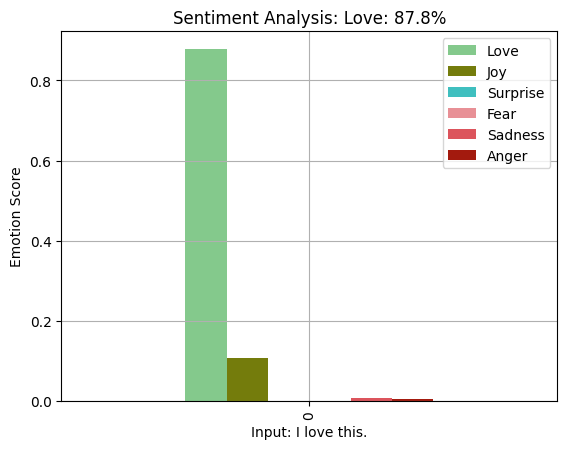

In [64]:
# Test the function
x,y = predict_sentiment('ahhh, i hate you.')
x
y

# Gradio UI

In [ ]:
!pip install gradio

In [68]:
# %%writefile -a app.py

import gradio
in_box = [gradio.Textbox(lines=1, label="Input", placeholder="type text here")]
out_box = [gradio.Plot(label="Sentiment Score:"),
  gradio.Textbox(lines=4, label="Raw JSON Response:")]
title = "Sentiment Analysis: Understanding the Emotional Tone of Text"
desc = "Sentiment analysis is a powerful tool that can be used to gain insights into how people feel about the world around them."
exp = [
  ['I am feeling very bad today.'],
  ['I hate to swim early morning.']
 ]

Appending to app.py


In [69]:
# %%writefile -a app.py

gradio.Interface(fn=predict_sentiment,
  inputs=in_box,
  outputs=out_box,
  title=title,
  description=desc,
  examples=exp).launch(debug=True)

Appending to app.py


# Uploading to Hugging face

## Create requirment.txt

In [70]:
# create the requirements.txt file
txt = ["huggingface_hub", "torch",
  "transformers", "scipy", "gradio", "cryptography", "psutil"]
sentiment.utility.write_file("requirements.txt", txt)

In [40]:
# optional double check it
!cat requirements.txt

huggingface_hub
torch
transformers
scipy
gradio
cryptography
psutil

In [71]:
sentiment.hface_space = 'GirishKiran/sentiment'
up_files = ["app.py", "requirements.txt"]
sentiment.utility.push_hface_files(up_files, hf_space=sentiment.hface_space)

# API

## Post

In [9]:
import requests

end_point = 'https://girishkiran-sentiment.hf.space/run/predict'
response = requests.post(end_point, json={
  "data": [
    "I hate to swim early morning.",
]}).json()

data = response["data"]
print(data[1])

{"Sadness":{"0":0.0234352797},"Joy":{"0":0.1141998619},"Love":{"0":0.0036023685},"Anger":{"0":0.0805795714},"Fear":{"0":0.7764459848},"Surprise":{"0":0.0017369982}}


## Python

In [ ]:
!pip install gradio_client

In [3]:
from gradio_client import Client

client = Client("https://girishkiran-sentiment.hf.space/")
result = client.predict(
				"I hate to swim early morning.",
				api_name="/predict"
)
print(result[1])


Loaded as API: https://girishkiran-sentiment.hf.space/ ✔
{"Sadness":{"0":0.0151823629},"Joy":{"0":0.1143344864},"Love":{"0":0.0031632562},"Anger":{"0":0.7523047328},"Fear":{"0":0.0804230794},"Surprise":{"0":0.0345920473}}


# Scratch pad

In [ ]:
import gradio

md='models/bhadresh-savani/distilbert-base-uncased-emotion'
t='Maggie: YML Hackathon Image Generation'
d='This space is for the YML Hackathon. The API link is on the bottom of the page.'
a = f'Note: The underline model is the Stable Diffusion: {md}'
gradio.load(md,title=t,description=d,article=a).launch(share=True)

In [39]:
# Print classifiers like Joy, Anger , Sad , etc
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier("ahhh, i hate you.", )
print(prediction)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[[{'label': 'sadness', 'score': 0.026229390874505043}, {'label': 'joy', 'score': 0.00327300070784986}, {'label': 'love', 'score': 0.005280262790620327}, {'label': 'anger', 'score': 0.9632093906402588}, {'label': 'fear', 'score': 0.001601203577592969}, {'label': 'surprise', 'score': 0.00040670172893442214}]]
